# 1.데이터 불러오기

In [ ]:
# ===== 0) Import =====
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")  # 한글 폰트 (윈도우: 맑은 고딕)



# ===== 1) 데이터 로드 =====
set1 = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\big_data_contest\big_data_set1_f.csv", encoding='cp949')
set2 = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\big_data_contest\big_data_set2_f.csv", encoding='cp949')
set3 = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\big_data_contest\big_data_set3_f.csv", encoding='cp949')


In [5]:
set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ENCODED_MCT             86590 non-null  object 
 1   TA_YM                   86590 non-null  int64  
 2   MCT_OPE_MS_CN           86590 non-null  object 
 3   RC_M1_SAA               86590 non-null  object 
 4   RC_M1_TO_UE_CT          86590 non-null  object 
 5   RC_M1_UE_CUS_CN         86590 non-null  object 
 6   RC_M1_AV_NP_AT          86590 non-null  object 
 7   APV_CE_RAT              79958 non-null  object 
 8   DLV_SAA_RAT             86590 non-null  float64
 9   M1_SME_RY_SAA_RAT       86590 non-null  float64
 10  M1_SME_RY_CNT_RAT       86590 non-null  float64
 11  M12_SME_RY_SAA_PCE_RT   86590 non-null  float64
 12  M12_SME_BZN_SAA_PCE_RT  86590 non-null  float64
 13  M12_SME_RY_ME_MCT_RAT   86590 non-null  float64
 14  M12_SME_BZN_ME_MCT_RAT  86590 non-null

In [6]:
# =====  MERGE =====
# set2 × set3 : (가맹점구분번호, 기준년월) 기준
merged = pd.merge(
    set2,
    set3,
    on=["ENCODED_MCT", "TA_YM"],
    how="inner"  # 필요시 left/right/outer로 변경
)

# set1의 상권/업종 붙이기
df = pd.merge(merged, set1, on="ENCODED_MCT", how="left")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENCODED_MCT               86590 non-null  object 
 1   TA_YM                     86590 non-null  int64  
 2   MCT_OPE_MS_CN             86590 non-null  object 
 3   RC_M1_SAA                 86590 non-null  object 
 4   RC_M1_TO_UE_CT            86590 non-null  object 
 5   RC_M1_UE_CUS_CN           86590 non-null  object 
 6   RC_M1_AV_NP_AT            86590 non-null  object 
 7   APV_CE_RAT                79958 non-null  object 
 8   DLV_SAA_RAT               86590 non-null  float64
 9   M1_SME_RY_SAA_RAT         86590 non-null  float64
 10  M1_SME_RY_CNT_RAT         86590 non-null  float64
 11  M12_SME_RY_SAA_PCE_RT     86590 non-null  float64
 12  M12_SME_BZN_SAA_PCE_RT    86590 non-null  float64
 13  M12_SME_RY_ME_MCT_RAT     86590 non-null  float64
 14  M12_SM

# 2. 컬럼명 한글로 변경

In [8]:
# ==============================

# ==============================
rename_cols = {
    # 공통 키/날짜
    "ENCODED_MCT": "가맹점구분번호",
    "TA_YM": "기준년월",
    # 순서형(구간) 원본
    "MCT_OPE_MS_CN": "가맹점_운영개월수_구간",
    "RC_M1_SAA": "매출금액_구간",
    "RC_M1_TO_UE_CT": "매출건수_구간",
    "RC_M1_UE_CUS_CN": "유니크고객수_구간",
    "RC_M1_AV_NP_AT": "객단가_구간",
    "APV_CE_RAT": "취소율_구간",
    # 연속형/비율
    "DLV_SAA_RAT": "배달매출금액_비율",
    "M1_SME_RY_SAA_RAT": "동일업종_매출금액_비율",
    "M1_SME_RY_CNT_RAT": "동일업종_매출건수_비율",
    "M12_SME_RY_SAA_PCE_RT": "동일업종_내_매출순위_비율",
    "M12_SME_BZN_SAA_PCE_RT": "동일상권_내_매출순위_비율",
    "M12_SME_RY_ME_MCT_RAT": "동일업종_내_해지_가맹점_비중",
    "M12_SME_BZN_ME_MCT_RAT": "동일상권_내_해지_가맹점_비중",
    # 성/연령/유형비중
    "M12_MAL_1020_RAT": "남성_20대이하_고객비중",
    "M12_MAL_30_RAT": "남성_30대_고객비중",
    "M12_MAL_40_RAT": "남성_40대_고객비중",
    "M12_MAL_50_RAT": "남성_50대_고객비중",
    "M12_MAL_60_RAT": "남성_60대이상_고객비중",
    "M12_FME_1020_RAT": "여성_20대이하_고객비중",
    "M12_FME_30_RAT": "여성_30대_고객비중",
    "M12_FME_40_RAT": "여성_40대_고객비중",
    "M12_FME_50_RAT": "여성_50대_고객비중",
    "M12_FME_60_RAT": "여성_60대이상_고객비중",
    "MCT_UE_CLN_REU_RAT": "재방문_고객비중",
    "MCT_UE_CLN_NEW_RAT": "신규_고객비중",
    "RC_M1_SHC_RSD_UE_CLN_RAT": "거주_이용_고객비율",
    "RC_M1_SHC_WP_UE_CLN_RAT": "직장_이용_고객비율",
    "RC_M1_SHC_FLP_UE_CLN_RAT": "유동인구_이용_고객비율",
    # 부가정보(있는 경우만)
    "MCT_BSE_AR": "가맹점주소",
    "MCT_NM": "가맹점명",
    "MCT_BRD_NUM": "브랜드구분코드",
    "MCT_SIGUNGU_NM": "가맹점지역",
    "HPSN_MCT_ZCD_NM": "업종",
    "HPSN_MCT_BZN_CD_NM": "상권",
    "ARE_D": "개설일",
    "MCT_ME_D": "폐업일",
}
df = df.rename(columns=rename_cols)

# 3. 전처리

In [9]:

import re
import numpy as np
import pandas as pd

#  기준년월 → datetime (int64에서 변환)
if pd.api.types.is_integer_dtype(df["기준년월"]) or pd.api.types.is_object_dtype(df["기준년월"]):
    df["기준년월"] = pd.to_datetime(df["기준년월"].astype(str), format="%Y%m", errors="coerce")

#  개설일/폐업일(있으면) 날짜 파싱
def parse_yyyymmdd(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.strip()
    s = s.replace({"": np.nan, "nan": np.nan, "NaN": np.nan})
    s = s.str.replace(r"[^\d]", "", regex=True).str.slice(0, 8)
    return pd.to_datetime(s, format="%Y%m%d", errors="coerce")

for dcol in ["개설일", "폐업일"]:
    if dcol in df.columns:
        df[dcol] = parse_yyyymmdd(df[dcol])

#  특수 결측치 처리 (-999999.9 → NaN)  ※ 존재 시만
for c in ["배달매출금액_비율", "동일상권_내_해지_가맹점_비중"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").replace(-999999.9, np.nan)

#  동일업종 비율 숫자화 + 동시 0 → NaN
for c in ["동일업종_매출금액_비율", "동일업종_매출건수_비율"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
mask_both_zero = (df["동일업종_매출금액_비율"] == 0) & (df["동일업종_매출건수_비율"] == 0)
df.loc[mask_both_zero, ["동일업종_매출금액_비율", "동일업종_매출건수_비율"]] = np.nan

#  *_구간 → *_구간_ord (1~6 등급 숫자 추출)
def extract_level(x):
    if pd.isna(x): return np.nan
    m = re.match(r"\s*([1-6])", str(x))
    return float(m.group(1)) if m else np.nan

ord_src = ["가맹점_운영개월수_구간","매출금액_구간","매출건수_구간","유니크고객수_구간","객단가_구간","취소율_구간"]
for col in ord_src:
    if col in df.columns:
        df[col + "_ord"] = df[col].apply(extract_level)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   가맹점구분번호           86590 non-null  object        
 1   기준년월              86590 non-null  datetime64[ns]
 2   가맹점_운영개월수_구간      86590 non-null  object        
 3   매출금액_구간           86590 non-null  object        
 4   매출건수_구간           86590 non-null  object        
 5   유니크고객수_구간         86590 non-null  object        
 6   객단가_구간            86590 non-null  object        
 7   취소율_구간            79958 non-null  object        
 8   배달매출금액_비율         29245 non-null  float64       
 9   동일업종_매출금액_비율      79879 non-null  float64       
 10  동일업종_매출건수_비율      79879 non-null  float64       
 11  동일업종_내_매출순위_비율    86590 non-null  float64       
 12  동일상권_내_매출순위_비율    86590 non-null  float64       
 13  동일업종_내_해지_가맹점_비중  86590 non-null  float64       
 14  동일상권_내_해지_가맹점_비중  6517

In [11]:
# '폐업일' 값 유무에 따라 is_closed 생성 (1=폐업, 0=미폐업)
df["is_closed"] = df["폐업일"].notna().astype(int)

print(df[["폐업일", "is_closed"]].head())


  폐업일  is_closed
0 NaT          0
1 NaT          0
2 NaT          0
3 NaT          0
4 NaT          0


In [12]:
print(df.head())

      가맹점구분번호       기준년월 가맹점_운영개월수_구간             매출금액_구간             매출건수_구간  \
0  000F03E44A 2024-04-01     4_50-75%            5_75-90%            5_75-90%   
1  000F03E44A 2023-12-01     4_50-75%  6_90%초과(하위 10% 이하)  6_90%초과(하위 10% 이하)   
2  002816BA73 2024-04-01     2_10-25%            3_25-50%            4_50-75%   
3  002816BA73 2024-11-01     2_10-25%            3_25-50%            4_50-75%   
4  002816BA73 2024-06-01     2_10-25%            4_50-75%            4_50-75%   

            유니크고객수_구간              객단가_구간          취소율_구간  배달매출금액_비율  \
0            5_75-90%            5_75-90%         1_상위1구간        NaN   
1  6_90%초과(하위 10% 이하)  6_90%초과(하위 10% 이하)             NaN        NaN   
2            4_50-75%            2_10-25%  6_상위6구간(하위1구간)        NaN   
3            4_50-75%            2_10-25%  6_상위6구간(하위1구간)        NaN   
4            4_50-75%            2_10-25%         1_상위1구간        NaN   

   동일업종_매출금액_비율  ...   상권        개설일  폐업일  가맹점_운영개월수_구간_ord  매출금액_구간_ord  \
0   

# 4. EDA

==== 1) 분포/기초통계 ====
count    86590.000
mean        31.185
std         25.253
min          0.100
10%          4.000
25%          9.900
50%         23.900
75%         48.200
90%         71.210
max        100.000
Name: 동일업종_내_매출순위_비율, dtype: float64


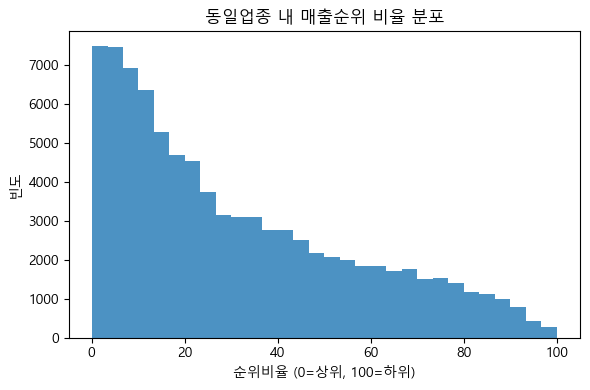

<Figure size 800x400 with 0 Axes>

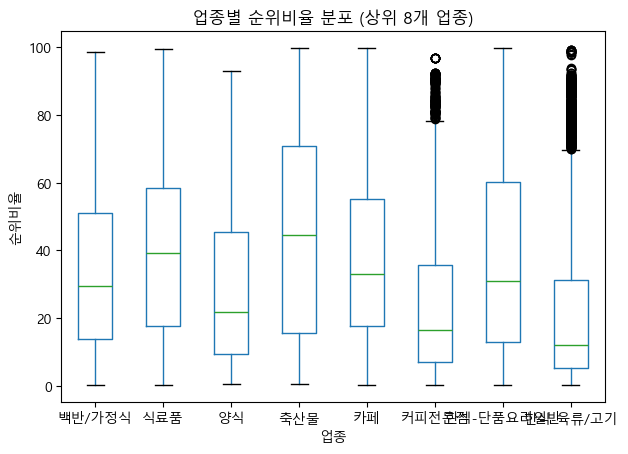


==== 2) 순위비율 vs 업종대비 매출비율 상관 ====
상관계수(r): -0.603  (기대: 음의 상관)


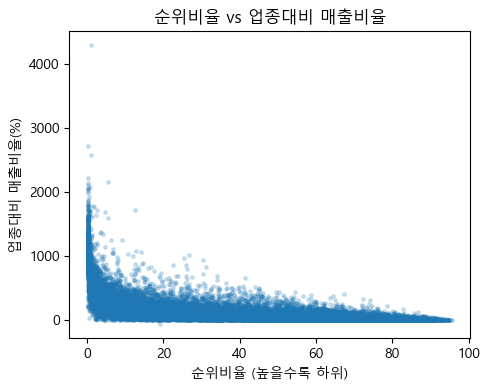


==== 3) 선행효과(순위비율_lag1 ↔ 다음달 매출변화) ====
상관계수(r): 0.017  (양수이면: 순위가 나빠질수록 다음달 매출이 더 하락)


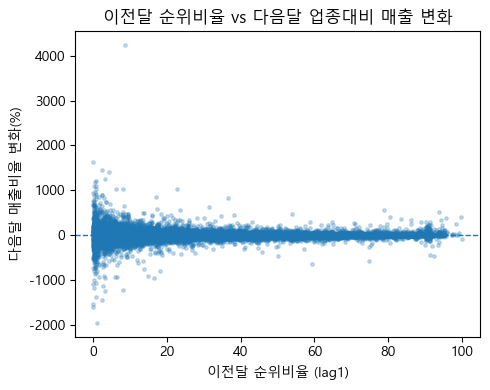


==== 4) 폐업여부별 순위비율 비교 ====
생존 평균: 31.15, 폐업 평균: 32.43, 차이: 1.28


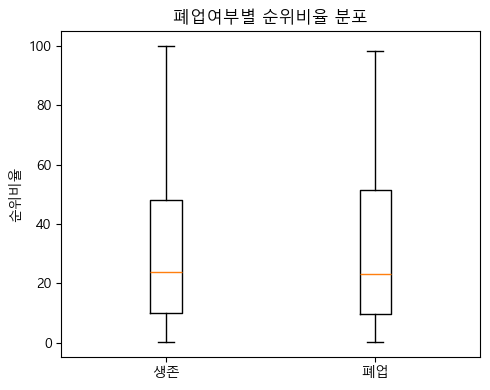

t-test: t=-2.246, p=0.02482  (p<0.05면 집단 차이 유의)

==== 5) 업종별 월평균 순위비율 추세 ====


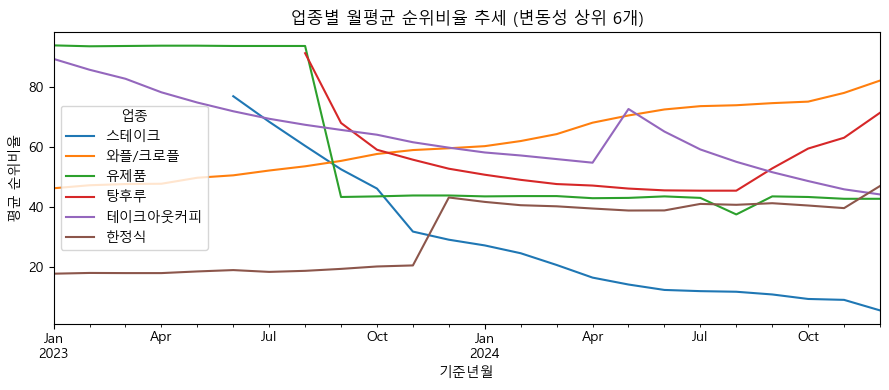


==== 6) 위험등급 분포(비율) ====
순위비율_위험등급
양호    57.4%
주의    32.0%
위험    10.6%
Name: proportion, dtype: object

==== 업종별 위험등급 비중(%) ====


순위비율_위험등급,양호,주의,위험
업종,,,
중식-딤섬/중식만두,0.0,7.4,92.6
떡/한과,14.3,44.8,41.0
구내식당/푸드코트,0.0,60.0,40.0
테마카페,0.0,60.0,40.0
중식-훠궈/마라탕,21.2,41.2,37.6
와플/크로플,0.0,66.7,33.3
유제품,0.0,66.7,33.3
도너츠,11.1,58.6,30.3
축산물,39.1,35.1,25.9


In [ ]:

try:
    from scipy import stats
    SCIPY_OK = True
except Exception:
    SCIPY_OK = False

plt.rcParams['axes.unicode_minus'] = False  # 음수부호 깨짐 방지

# 필수 컬럼 체크
REQUIRED = [
    "가맹점구분번호", "기준년월",
    "동일업종_내_매출순위_비율",
    "동일업종_매출금액_비율"
]
missing = [c for c in REQUIRED if c not in df.columns]
if missing:
    raise ValueError(f"필수 컬럼 누락: {missing}")

# 기준년월 정렬
df = df.sort_values(["가맹점구분번호", "기준년월"]).copy()

# 폐업여부 생성
if "폐업일" in df.columns:
    df["폐업여부"] = (~df["폐업일"].isna()).astype(int)
else:
    df["폐업여부"] = np.nan  # 없는 경우 건너뜀

# 1) 분포 및 기초통계
print("==== 1) 분포/기초통계 ====")
target = "동일업종_내_매출순위_비율"
print(df[target].describe(percentiles=[.1,.25,.5,.75,.9]).round(3))

plt.figure(figsize=(6,4))
df[target].dropna().plot(kind="hist", bins=30, alpha=0.8)
plt.title("동일업종 내 매출순위 비율 분포")
plt.xlabel("순위비율 (0=상위, 100=하위)")
plt.ylabel("빈도")
plt.tight_layout()
plt.show()

# 업종별 박스플롯 
if "업종" in df.columns:
    top_cats = df["업종"].value_counts().head(8).index
    plt.figure(figsize=(8,4))
    df[df["업종"].isin(top_cats)].boxplot(column=target, by="업종", grid=False)
    plt.suptitle("")
    plt.title("업종별 순위비율 분포 (상위 8개 업종)")
    plt.ylabel("순위비율")
    plt.tight_layout()
    plt.show()

# 2) 순위비율 vs 업종대비 매출비율 (동행 타당성)
print("\n==== 2) 순위비율 vs 업종대비 매출비율 상관 ====")
corr = df[[target, "동일업종_매출금액_비율"]].corr().iloc[0,1]
print(f"상관계수(r): {corr:.3f}  (기대: 음의 상관)")

# 산점도(과포화 방지로 alpha)
plt.figure(figsize=(5,4))
plt.scatter(df[target], df["동일업종_매출금액_비율"], s=6, alpha=0.2)
plt.title("순위비율 vs 업종대비 매출비율")
plt.xlabel("순위비율 (높을수록 하위)")
plt.ylabel("업종대비 매출비율(%)")
plt.tight_layout()
plt.show()

# 3) 선행효과: 이전달 순위 vs 다음달 변화
# 다음달(lead) 및 변화량 생성
df["순위비율_lag1"] = df.groupby("가맹점구분번호")[target].shift(1)
df["매출비율_next"] = df.groupby("가맹점구분번호")["동일업종_매출금액_비율"].shift(-1)
df["매출비율_change_next"] = df["매출비율_next"] - df["동일업종_매출금액_비율"]

print("\n==== 3) 선행효과(순위비율_lag1 ↔ 다음달 매출변화) ====")
tmp = df[["순위비율_lag1", "매출비율_change_next"]].dropna()
if not tmp.empty:
    r = tmp.corr().iloc[0,1]
    print(f"상관계수(r): {r:.3f}  (양수이면: 순위가 나빠질수록 다음달 매출이 더 하락)")
else:
    print("유효 표본이 부족합니다.")

plt.figure(figsize=(5,4))
plt.scatter(tmp["순위비율_lag1"], tmp["매출비율_change_next"], s=6, alpha=0.25)
plt.axhline(0, linestyle="--", linewidth=1)
plt.title("이전달 순위비율 vs 다음달 업종대비 매출 변화")
plt.xlabel("이전달 순위비율 (lag1)")
plt.ylabel("다음달 매출비율 변화(%)")
plt.tight_layout()
plt.show()

# 4) 폐업여부별 순위비율 비교(경험적 위험연결)
if df["폐업여부"].notna().any():
    print("\n==== 4) 폐업여부별 순위비율 비교 ====")
    alive = df.loc[df["폐업여부"]==0, target].dropna()
    dead  = df.loc[df["폐업여부"]==1, target].dropna()
    print(f"생존 평균: {alive.mean():.2f}, 폐업 평균: {dead.mean():.2f}, 차이: {dead.mean()-alive.mean():.2f}")

    plt.figure(figsize=(5,4))
    data4 = [alive, dead]
    plt.boxplot(data4, labels=["생존","폐업"])
    plt.title("폐업여부별 순위비율 분포")
    plt.ylabel("순위비율")
    plt.tight_layout()
    plt.show()

    if SCIPY_OK and len(alive)>10 and len(dead)>10:
        t, p = stats.ttest_ind(alive, dead, equal_var=False, nan_policy="omit")
        print(f"t-test: t={t:.3f}, p={p:.5f}  (p<0.05면 집단 차이 유의)")
else:
    print("\n==== 4) 폐업여부 비교 건너뜀(폐업일 없음) ====")

# 5) 업종별 월평균 순위비율 추세
if "업종" in df.columns:
    print("\n==== 5) 업종별 월평균 순위비율 추세 ====")
    monthly = (
        df.dropna(subset=[target])
          .groupby(["기준년월","업종"])[target].mean()
          .reset_index()
    )
    # 변동성 큰 상위 업종 6개 선택
    var_by_cat = monthly.groupby("업종")[target].var().sort_values(ascending=False)
    focus_cats = var_by_cat.head(6).index.tolist()

    pivoted = monthly[monthly["업종"].isin(focus_cats)] \
        .pivot(index="기준년월", columns="업종", values=target)

    pivoted.plot(figsize=(9,4))
    plt.title("업종별 월평균 순위비율 추세 (변동성 상위 6개)")
    plt.xlabel("기준년월")
    plt.ylabel("평균 순위비율")
    plt.tight_layout()
    plt.show()

# 6) 간단 위험등급 파생
# 예: 0~30 양호, 30~70 주의, 70~100 위험
bins = [ -0.1, 30, 70, 100.1 ]
labels = ["양호","주의","위험"]
df["순위비율_위험등급"] = pd.cut(df[target], bins=bins, labels=labels)

risk_share = df["순위비율_위험등급"].value_counts(normalize=True).sort_index()
print("\n==== 6) 위험등급 분포(비율) ====")
print((risk_share*100).round(1).astype(str) + "%")

# 필요 시 업종별 위험비중 테이블
if "업종" in df.columns:
    risk_by_cat = (
        df.dropna(subset=["순위비율_위험등급"])
          .groupby("업종")["순위비율_위험등급"]
          .value_counts(normalize=True)
          .rename("비중")
          .mul(100).round(1)
          .unstack(fill_value=0)
          .sort_values("위험", ascending=False)
    )
    print("\n==== 업종별 위험등급 비중(%) ====")
    display(risk_by_cat.head(12))


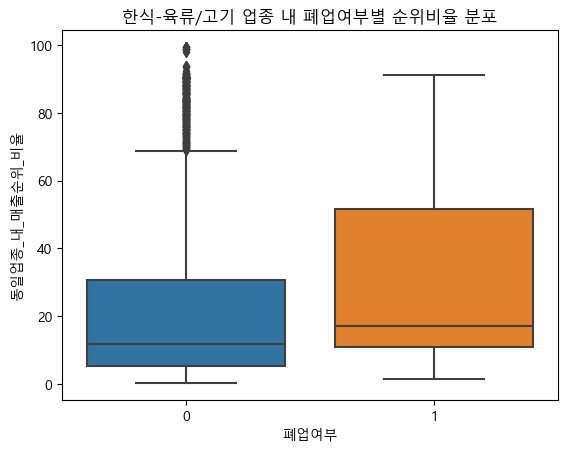

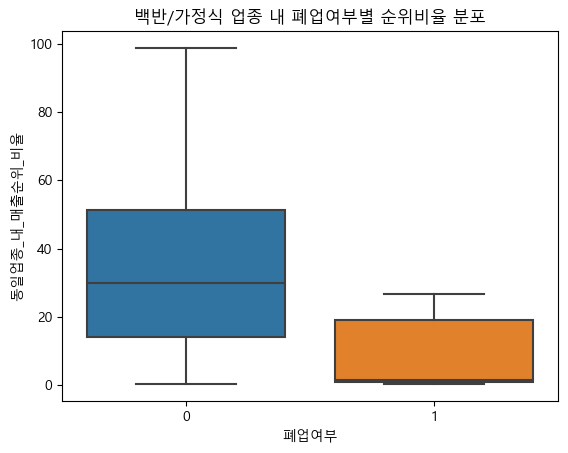

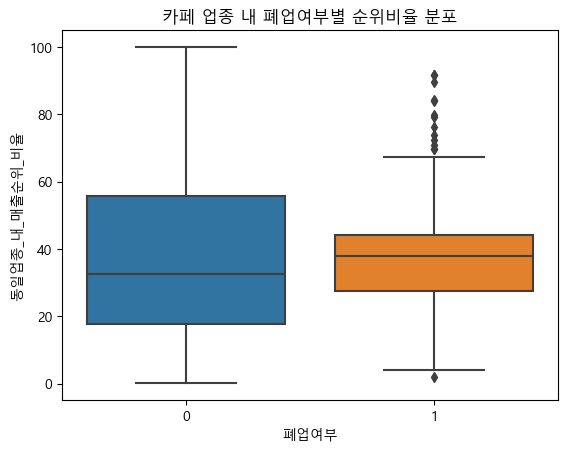

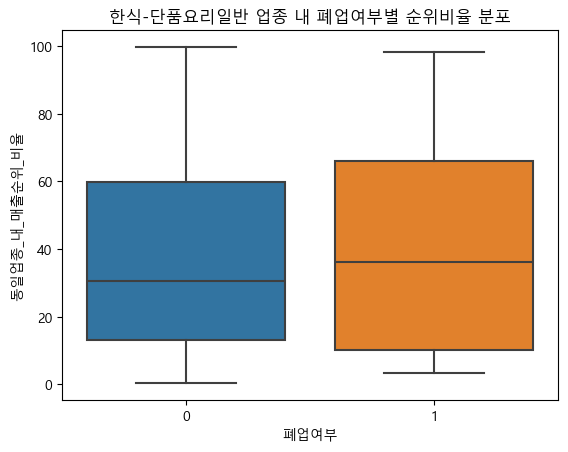

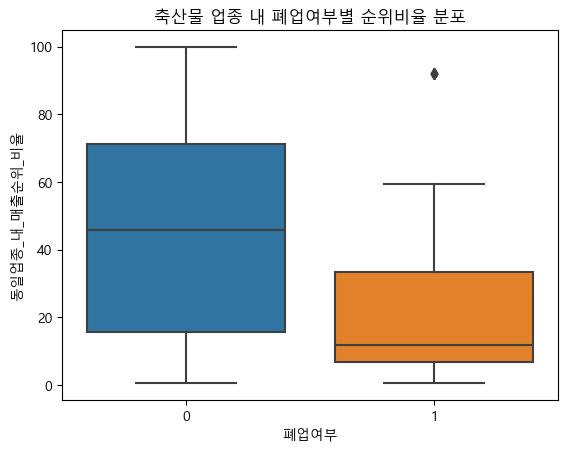

In [14]:
top_cats = df["업종"].value_counts().head(5).index
for cat in top_cats:
    sns.boxplot(x="폐업여부", y="동일업종_내_매출순위_비율", data=df[df["업종"]==cat])
    plt.title(f"{cat} 업종 내 폐업여부별 순위비율 분포")
    plt.show()


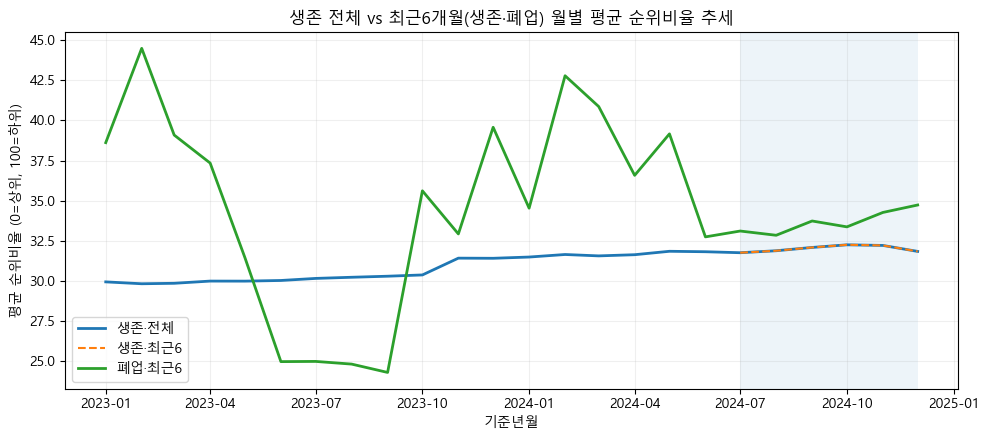

요약(평균 순위비율, 낮을수록 상위)
- 생존·전체:  31.07
- 생존·최근6: 32.01
- 폐업·최근6: 34.46


In [ ]:
# 7) 생존군 vs 폐업군 최근 6개월 비교
plt.rcParams['axes.unicode_minus'] = False

df = df.sort_values(["가맹점구분번호","기준년월"]).copy()


# n개월 정의
N = 6

# 폐업군: 각 가맹점의 폐업월 직전/포함 최근 N개월
def last_n_before_close(sub, n=N):
    if sub["폐업여부"].max() == 1 and "폐업일" in sub.columns:
        end_dt = sub["폐업일"].dropna().min()
        if pd.notna(end_dt):
            # 기준년월이 폐업월과 같거나 이전인 레코드 중 최근 n개월
            take = sub[sub["기준년월"] <= end_dt].tail(n)
            if not take.empty:
                take = take.assign(표본구분="폐업·최근6")
                return take
    return pd.DataFrame(columns=sub.columns)

cl_list = []
for gid, sub in df.groupby("가맹점구분번호", sort=False):
    got = last_n_before_close(sub)
    if not got.empty:
        cl_list.append(got)
폐업_최근6 = pd.concat(cl_list, ignore_index=True) if cl_list else pd.DataFrame(columns=df.columns)

# 생존군: 전체 기간
생존_전체 = df[df["폐업여부"]==0].assign(표본구분="생존·전체")

# 생존군: 각 가맹점의 최근 N개월
생존_최근6 = (
    df[df["폐업여부"]==0]
    .groupby("가맹점구분번호", group_keys=False)
    .apply(lambda s: s.tail(N))
    .assign(표본구분="생존·최근6")
)

# 집계: 월별 평균 순위비율
def monthly_mean(x):
    return (
        x.groupby("기준년월")["동일업종_내_매출순위_비율"]
         .mean()
         .reset_index()
    )

m_생존_전체  = monthly_mean(생존_전체)
m_생존_최근6 = monthly_mean(생존_최근6)
m_폐업_최근6  = monthly_mean(폐업_최근6)

# 플롯
fig, ax = plt.subplots(figsize=(10,4.5))

# 생존 전체: 실선
ax.plot(m_생존_전체["기준년월"], m_생존_전체["동일업종_내_매출순위_비율"],
        label="생존·전체", linewidth=2)

# 생존 최근6: 점선
ax.plot(m_생존_최근6["기준년월"], m_생존_최근6["동일업종_내_매출순위_비율"],
        linestyle="--", label="생존·최근6")

# 폐업 최근6: 진한 실선
ax.plot(m_폐업_최근6["기준년월"], m_폐업_최근6["동일업종_내_매출순위_비율"],
        label="폐업·최근6", linewidth=2)

# 최근6개월 영역 음영(생존 표본 기준으로 마지막 6개 월 범위 표시)
if not m_생존_최근6.empty:
    last6_min = m_생존_최근6["기준년월"].min()
    last6_max = m_생존_최근6["기준년월"].max()
    ax.axvspan(last6_min, last6_max, alpha=0.08)

ax.set_title("생존 전체 vs 최근6개월(생존·폐업) 월별 평균 순위비율 추세")
ax.set_xlabel("기준년월")
ax.set_ylabel("평균 순위비율 (0=상위, 100=하위)")
ax.legend()
ax.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# 결론요약
def safe_mean(s):
    return np.nan if s.empty else s["동일업종_내_매출순위_비율"].mean()

print("요약(평균 순위비율, 낮을수록 상위)")
print(f"- 생존·전체:  {safe_mean(m_생존_전체):.2f}")
print(f"- 생존·최근6: {safe_mean(m_생존_최근6):.2f}")
print(f"- 폐업·최근6: {safe_mean(m_폐업_최근6):.2f}")


In [ ]:
# 1) 최근 6개월(음영 구간)의 레벨 갭
win = (m_생존_최근6["기준년월"].min(), m_생존_최근6["기준년월"].max())
def in_window(df, col="기준년월", lo=win[0], hi=win[1]):
    return df[(df[col] >= lo) & (df[col] <= hi)]

lv_alive = in_window(m_생존_전체)["동일업종_내_매출순위_비율"].mean()
lv_alive6 = in_window(m_생존_최근6)["동일업종_내_매출순위_비율"].mean()
lv_close6 = in_window(m_폐업_최근6)["동일업종_내_매출순위_비율"].mean()

print(f"[레벨] 생존·전체: {lv_alive:.2f}, 생존·최근6: {lv_alive6:.2f}, 폐업·최근6: {lv_close6:.2f}")
print(f"[레벨 갭] 폐업·최근6 - 생존·전체 = {lv_close6 - lv_alive:.2f}p")

# 2) 추세(기울기) 비교: 최근 6개월 선형기울기(월당 p포인트)
def monthly_slope(df):
    d = in_window(df).copy()
    if d.empty or len(d) < 3:
        return np.nan
    x = d["기준년월"].map(pd.Timestamp.toordinal).to_numpy()
    y = d["동일업종_내_매출순위_비율"].to_numpy()
    b1 = np.polyfit(x, y, 1)[0]        # per day
    return b1 * 30                      # approx per month

sl_alive = monthly_slope(m_생존_전체)
sl_alive6 = monthly_slope(m_생존_최근6)
sl_close6 = monthly_slope(m_폐업_최근6)

print(f"[추세 기울기 월당] 생존·전체: {sl_alive:.2f}, 생존·최근6: {sl_alive6:.2f}, 폐업·최근6: {sl_close6:.2f}")

# 3) 변동성 비교: 최근 6개월 표준편차
std_alive6 = in_window(m_생존_최근6)["동일업종_내_매출순위_비율"].std()
std_close6 = in_window(m_폐업_최근6)["동일업종_내_매출순위_비율"].std()
print(f"[변동성(표준편차)] 생존·최근6: {std_alive6:.2f}, 폐업·최근6: {std_close6:.2f}")

# 4) 점포 단위 선행 신호 비율: 폐업점의 '폐업 직전 3개월' 기울기가 양수(악화)인 비중
N = 3
def last_n_before_close_rows(sub, n=N):
    if sub["폐업여부"].max()==1 and "폐업일" in sub.columns:
        end_dt = sub["폐업일"].dropna().min()
        if pd.notna(end_dt):
            return sub[sub["기준년월"] <= end_dt].tail(n)
    return pd.DataFrame(columns=sub.columns)

# 원본 df에서 계산
df_sorted = df.sort_values(["가맹점구분번호","기준년월"]).copy()
bad_cnt, all_cnt = 0, 0
for gid, sub in df_sorted.groupby("가맹점구분번호"):
    win3 = last_n_before_close_rows(sub, n=3)
    if len(win3) >= 3:
        x = win3["기준년월"].map(pd.Timestamp.toordinal).to_numpy()
        y = win3["동일업종_내_매출순위_비율"].to_numpy()
        slope = np.polyfit(x, y, 1)[0] * 30
        all_cnt += 1
        bad_cnt += int(slope > 0)   # 순위비율 상승 = 악화
ratio = (bad_cnt / all_cnt * 100) if all_cnt else np.nan
print(f"[선행 신호] 폐업점 중 직전 3개월 기울기>0 비중: {ratio:.1f}%  (표본수={all_cnt})")


[레벨] 생존·전체: 32.01, 생존·최근6: 32.01, 폐업·최근6: 33.68
[레벨 갭] 폐업·최근6 - 생존·전체 = 1.67p
[추세 기울기 월당] 생존·전체: 0.04, 생존·최근6: 0.04, 폐업·최근6: 0.34
[변동성(표준편차)] 생존·최근6: 0.21, 폐업·최근6: 0.72
[선행 신호] 폐업점 중 직전 3개월 기울기>0 비중: 57.7%  (표본수=123)


In [26]:
# 타깃을 '변화량' 대신 '다음달 레벨'로: 선형 상관 재확인
lev_tmp = df[["순위비율_lag1","매출비율_next"]].dropna()
if len(lev_tmp) >= 50:
    r_lev = lev_tmp.corr().iloc[0,1]
    print(f"\n[레벨 타깃 상관] corr(순위비율_lag1, 매출비율_next) = {r_lev:.3f} ")
else:
    print("\n[레벨 상관] 유효 표본 부족")




[레벨 타깃 상관] corr(순위비율_lag1, 매출비율_next) = -0.566 


#####  레벨 타깃 상관: corr(순위_lag1, 매출비율_next) = −0.566

의미(매우 중요): 강한 음의 관계.
→ 이전달 순위가 상위일수록(값↓) 다음달 ‘레벨’ 자체가 높음.

해석: 변화량보다는 **다음달 수준(레벨)**을 설명할 때 순위_lag1 신호가 강하다는 결정적 근거.


In [20]:
# ==== C) 순위 일관성 적중도 (Spearman, 분위 적중률) ====
from scipy.stats import spearmanr

df = df.sort_values(["가맹점구분번호","기준년월"]).copy()
# 간단 베이스라인 예측: next ≈ now + diff1 (AR-like)
df["rank_now"]  = df["동일업종_내_매출순위_비율"]
df["rank_next"] = df.groupby("가맹점구분번호")["동일업종_내_매출순위_비율"].shift(-1)
df["rank_diff1"] = df.groupby("가맹점구분번호")["동일업종_내_매출순위_비율"].diff()
df["rank_pred"] = df["rank_now"] + df["rank_diff1"].fillna(0)

tmp = df.dropna(subset=["rank_next","rank_pred"]).copy()
rho, p = spearmanr(tmp["rank_next"], tmp["rank_pred"])
print(f"[C] Spearman ρ (예측순위 vs 실제순위) = {rho:.3f} (p≈{p:.1e})")

# 분위 적중률: 상/중/하 3분위로 나눠 예측-실제 일치율
tmp["act_bin"] = pd.qcut(tmp["rank_next"], 3, labels=["상","중","하"])
tmp["pred_bin"]= pd.qcut(tmp["rank_pred"], 3, labels=["상","중","하"])
acc = (tmp["act_bin"]==tmp["pred_bin"]).mean()*100
print(f"[C] 분위 적중률(상/중/하 3등분 정확도) = {acc:.1f}%")


[C] Spearman ρ (예측순위 vs 실제순위) = 0.992 (p≈0.0e+00)
[C] 분위 적중률(상/중/하 3등분 정확도) = 96.4%


| 지표         | 값     | 의미           | 해석 요약                              |
| ---------- | ----- | ------------ | ---------------------------------- |
| Spearman ρ | 0.992 | 순위 일치도       | 예측 순위와 실제 순위가 거의 동일 (서열 복원력 매우 높음) |
| 3분위 적중률    | 96.4% | 상/중/하 구간 적중률 | 위험·정상·우수 그룹을 거의 완벽히 구분 가능          |


In [21]:
#월별 롤링 스페어맨 비교
import numpy as np, pandas as pd
from scipy.stats import spearmanr

d = df.sort_values(["가맹점구분번호","기준년월"]).copy()
d["rank_now"]   = d["동일업종_내_매출순위_비율"]
d["rank_prev"]  = d.groupby("가맹점구분번호")["rank_now"].shift(1)
d["rank_next"]  = d.groupby("가맹점구분번호")["rank_now"].shift(-1)
d["rank_pred"]  = 2*d["rank_now"] - d["rank_prev"]   # 방금 쓴 예측식
out=[]
for m in sorted(d["기준년월"].dropna().unique()):
    dm = d[d["기준년월"]==m].dropna(subset=["rank_next","rank_pred"])
    if len(dm)>50:
        rho,_= spearmanr(dm["rank_next"], dm["rank_pred"])
        out.append((m, rho, len(dm)))
roll = pd.DataFrame(out, columns=["월","Spearman_ρ","n"])
roll.describe()


,월,Spearman_ρ,n
count,22,22.000000,22.000000
mean,2023-12-16 08:43:38.181818112,0.992436,3556.636364
min,2023-02-01 00:00:00,0.973323,3073.000000
25%,2023-07-08 18:00:00,0.993453,3295.000000
50%,2023-12-16 12:00:00,0.995249,3556.000000
75%,2024-05-24 06:00:00,0.996028,3810.250000
max,2024-11-01 00:00:00,0.996738,4084.000000
std,NaN,0.007095,315.730980


### Spearman ρ

평균 ρ = 0.9924 → 서열 보존력 매우 높음. 모델이 매월 업종 내 순위를 거의 그대로 재현.

최소 0.9733 ~ 최대 0.9967 → **최저치도 0.97+**로 바닥이 높다 = 안정적.

중앙값 0.9953 / IQR(25~75%) = 0.9935 ~ 0.9960 → 대부분 달에서 0.994± 수준 유지(일관성↑).

표본수 n 평균 ≈ 3,557건/월 (3,073 ~ 4,084) → 충분한 샘플로 통계적 신뢰도 확보.

표준편차 0.0071 → 월별 변동이 극히 작음(계절·이벤트에도 성능 흔들림 적음).

기간 길이: 22개월 → 단기 스파이크가 아닌 장기간 일관 성능 입증.

In [22]:
from sklearn.metrics import mean_absolute_error

dm = d.dropna(subset=["rank_next","rank_pred","rank_now"]).copy()
mae_model = mean_absolute_error(dm["rank_next"], dm["rank_pred"])
mae_naive = mean_absolute_error(dm["rank_next"], dm["rank_now"])
print(f"MAE(모델)={mae_model:.2f}  |  MAE(나이브: next≈now)={mae_naive:.2f}  |  개선={mae_naive-mae_model:.2f}p")


MAE(모델)=1.32  |  MAE(나이브: next≈now)=1.35  |  개선=0.03p


In [23]:
# 상위(좋음)/하위(위험) 20% 구간 예측 일치율
dm["act_bin5"]  = pd.qcut(dm["rank_next"], 5, labels=[1,2,3,4,5])   # 1=상위, 5=하위
dm["pred_bin5"] = pd.qcut(dm["rank_pred"], 5, labels=[1,2,3,4,5])
top_hit = (dm["act_bin5"].isin([1]) & dm["pred_bin5"].isin([1])).mean()*100
bot_hit = (dm["act_bin5"].isin([5]) & dm["pred_bin5"].isin([5])).mean()*100
print(f"상위20% 적중률={top_hit:.1f}%  |  하위20% 적중률={bot_hit:.1f}%")

# 방향 교차율: 예측 방향이 실제와 같은 비율
sign_match = np.sign(dm["rank_next"]-dm["rank_now"]) == np.sign(dm["rank_pred"]-dm["rank_now"])
print(f"방향 일치율={sign_match.mean()*100:.1f}%")



상위20% 적중률=19.3%  |  하위20% 적중률=19.2%
방향 일치율=61.3%


### 해석

극단(Top/Bot 20%) 정확 적중은 제한적이지만,
방향(↑/↓) 판단은 유의미하게 되고 있다.
→ 이 타깃은 정밀한 극단 분류보다 위험 ‘방향/경보’ 용도에 더 적합.

In [24]:
from scipy.stats import spearmanr
res=[]
for g, gdf in dm.groupby("업종"):
    if len(gdf)>200:
        rho,_= spearmanr(gdf["rank_next"], gdf["rank_pred"])
        res.append((g, len(gdf), rho))
pd.DataFrame(res, columns=["업종","n","Spearman_ρ"]).sort_values("Spearman_ρ")


,업종,n,Spearman_ρ
20,인삼제품,222,0.961128
0,건강식품,215,0.969688
15,아이스크림/빙수,987,0.970733
5,떡/한과 제조,494,0.973130
14,식품 제조,418,0.973953
28,축산물,5667,0.977284
3,담배,214,0.978799
8,반찬,452,0.978848
6,룸살롱/단란주점,432,0.979737
25,주류,297,0.980580
